## Scattertext

In [1]:
import pickle
import itertools
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import scattertext as st
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import pysentiment2 as ps

from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer

from wordcloud import WordCloud
from sklearn.manifold import TSNE
from gensim.models import word2vec

pd.set_option('display.max_columns', 100)

In [2]:
corpus_ballmer = pickle.load(open('cleaned_corpus_ball.pickle', 'rb'))

In [3]:
corpus_nadella = pickle.load(open('cleaned_corpus_nad.pickle', 'rb'))

In [4]:
corpus_text_ballmer = []
for doc in corpus_ballmer:
    corpus_text_ballmer.append(' '.join(doc))

In [5]:
corpus_text_nadella = []
for doc in corpus_nadella:
    corpus_text_nadella.append(' '.join(doc))

In [6]:
quarters_ballmer = ['msft_07q3', 'msft_07q4', 'msft_08q1', 'msft_08q2', 'msft_08q3', 'msft_08q4', 'msft_09q1', 'msft_09q2', 'msft_09q3', 'msft_09q4', 'msft_10q1', 'msft_10q2', 'msft_10q3', 'msft_10q4', 'msft_11q1', 'msft_11q2', 'msft_11q3', 'msft_11q4', 'msft_12q1', 'msft_12q2', 'msft_12q3', 'msft_12q4', 'msft_13q1', 'msft_13q2', 'msft_13q3', 'msft_13q4', 'msft_14q1', 'msft_14q2']
quarters_nadella = ['msft_14q3', 'msft_14q4', 'msft_15q1', 'msft_15q2', 'msft_15q3', 'msft_15q4', 'msft_16q1', 'msft_16q2', 'msft_16q3', 'msft_16q4', 'msft_17q1', 'msft_17q2', 'msft_17q3', 'msft_17q4', 'msft_18q1', 'msft_18q2', 'msft_18q3', 'msft_18q4', 'msft_19q1', 'msft_19q2', 'msft_19q3', 'msft_19q4', 'msft_20q1', 'msft_20q2', 'msft_20q3', 'msft_20q4', 'msft_21q1', 'msft_21q2']

In [7]:
df_ballmer_scatter = pd.DataFrame(corpus_text_ballmer, columns=['text'])
df_ballmer_scatter['ceo'] = 'Ballmer'
df_ballmer_scatter['quarter'] = quarters_ballmer

In [8]:
df_nadella_scatter = pd.DataFrame(corpus_text_nadella, columns=['text'])
df_nadella_scatter['ceo'] = 'Nadella'
df_nadella_scatter['quarter'] = quarters_nadella

In [9]:
df_msft_scatter = pd.concat([df_ballmer_scatter, df_nadella_scatter], axis=0).reset_index(drop=True)

In [10]:
df_msft_scatter

,text,ceo,quarter
0,ahead everyone start provide key takeaway over...,Ballmer,msft_07q3
1,ahead everyone start provide key takeaway over...,Ballmer,msft_07q4
2,meet madam begin everyone setok start provide ...,Ballmer,msft_08q1
3,time listen mode answer session press star tou...,Ballmer,msft_08q2
4,meet heally begin heally everyone top start pr...,Ballmer,msft_08q3
5,yearn meet madam begin everyone setok start pr...,Ballmer,msft_08q4
6,time listenonly mode time hand mr ahead everyo...,Ballmer,msft_09q1
7,unknown speaker time mr begin everyone little ...,Ballmer,msft_09q2
8,time listen mode time meet mr begin barb every...,Ballmer,msft_09q3
9,mr begin barb everyone usual setok start takea...,Ballmer,msft_09q4


In [11]:
corpus = st.CorpusFromPandas(df_msft_scatter,
                             category_col='ceo',
                             text_col='text',
                             nlp=st.whitespace_nlp_with_sentences
                            ).build()

In [12]:
html = st.produce_scattertext_explorer(
        corpus,
        category='Ballmer',
        category_name='Steve Ballmer Era',
        not_category_name='Satya Nadella Era',
        minimum_term_frequency=10,
        pmi_threshold_coefficient=5,
        width_in_pixels=1000,
        metadata=df_msft_scatter['quarter'],
        )

In [13]:
open('scattertext_demo.html', 'wb').write(html.encode('utf-8'));

## Changes in Top 10 Words over Time

In [14]:
corpus_msft = pickle.load(open('cleaned_corpus_msft.pickle', 'rb'))

In [15]:
cv_msft = CountVectorizer(tokenizer=lambda doc: doc, lowercase=False, min_df=2)
X_msft = cv_msft.fit_transform(corpus_msft).toarray()

In [16]:
df_msft = pd.DataFrame(X_msft, columns=cv_msft.get_feature_names())

In [17]:
msft_top10_words = []

for i in range(len(corpus_msft)):
    msft_top10_words.append(list(df_msft.iloc[i].sort_values(ascending=False).head(10).index))

In [18]:
df_msft_top10_words = pd.DataFrame(msft_top10_words).T

In [19]:
fy_list = ['FY2007','FY2008','FY2009','FY2010','FY2011','FY2012','FY2013','FY2014','FY2015','FY2016','FY2017','FY2018','FY2019','FY2020','FY2021']
fy_quarters = ['Q1','Q2','Q3','Q4']

fy_quarter_pair = []
for year in fy_list:
    if year=='FY2007':
        fy_quarter_pair.extend([('FY2007', fy_quarters[2]), ('FY2007', fy_quarters[3])])
    elif year=='FY2021':
        fy_quarter_pair.extend([('FY2021', fy_quarters[0]), ('FY2021', fy_quarters[1])])
    else:
        for quarter in fy_quarters:
            fy_quarter_pair.append((year, quarter))

In [20]:
df_msft_top10_words.columns = pd.MultiIndex.from_tuples(fy_quarter_pair)

In [21]:
df_msft_top10_words

FY2007                 FY2008                                    \
         Q3        Q4           Q1          Q2        Q3          Q4   
0     vista  guidance      product     product  guidance      online   
1    impact      term      reserve      office      unit  investment   
2      sale   premium      operate    guidance     share    guidance   
3      rate       mix     guidance        half     yahoo       share   
4   product   product         sale        sale    income      search   
5  guidance      high         rate        rate    impact     service   
6       mix      rate         unit     operate    online     clearly   
7    number     share  expectation     company   operate        area   
8    launch  consumer       income       drive      rate       yahoo   
9     share       new    aquantive  investment   product        term   

        FY2009                                  FY2010              \
            Q1         Q2       Q3       Q4         Q1          Q2   
0     guidance    expense  product    start      start    consumer   
1       margin       half     rate  expense       cost        side   
2         cost       cost   remain     cost       side     product   
3          low      share    start   impact       term        cost   
4         high    annuity  decline  product   consumer  enterprise   
5  environment  certainly     cost     back     demand      attach   
6         term    decline      new     sale     attach       drive   
7         sale   consumer   impact  decline   calendar       cycle   
8     economic       rate      low     term        mix        flat   
9         rate     number  annuity     rate  certainly     reserve   

                                 FY2011                                      \
             Q3          Q4          Q1          Q2          Q3          Q4   
0        launch     product      office      office     service    customer   
1          cost    guidance     product     product      office        full   
2         cycle       great       cloud    consumer    customer  enterprise   
3       product       share    consumer      launch     product     product   
4        office  enterprise         new    customer  enterprise     service   
5      hardware      office        high      search       great      office   
6        online    consumer    customer      kinect         new        cost   
7          sort      online  enterprise     license        cost        xbox   
8      consumer        sort    momentum        sort        xbox       cloud   
9  yearoveryear        full     service  enterprise    consumer       share   

       FY2012                                            FY2013              \
           Q1         Q2          Q3          Q4             Q1          Q2   
0       skype       sort     product         new        service      device   
1     service      cloud  enterprise         sql         device     surface   
2      office     impact       cloud      office         office        sort   
3  enterprise        new      launch  enterprise  transactional   multiyear   
4     product    product     service     service         launch    customer   
5        xbox   consumer        high  capability       customer      launch   
6        cost    service     roadmap    customer           time        work   
7        sort        mix     reserve   multiyear            new     service   
8    customer       cost         sql       great        surface        time   
9        live  obviously      public       cloud     enterprise  enterprise   

                               FY2014                                  \
           Q3          Q4          Q1          Q2        Q3        Q4   
0      device     service  commercial       cloud     cloud     cloud   
1     service       cloud      office  commercial    office    device   
2         new         new       cloud    consumer    device    office   
3      office     surface    consume

## Keyword Frequency (Importance) over Time

In [22]:
sum_words_msft = X_msft.sum(axis=0)
words_freq_msft = [(word, sum_words_msft[idx]) for word, idx in cv_msft.vocabulary_.items()]
words_freq_msft = sorted(words_freq_msft, key = lambda x:x[1], reverse=True)

In [23]:
words_freq_msft

[('cloud', 1727),
 ('customer', 1375),
 ('service', 1325),
 ('office', 1210),
 ('new', 1103),
 ('azure', 1101),
 ('margin', 935),
 ('product', 917),
 ('impact', 915),
 ('commercial', 913),
 ('drive', 812),
 ('reserve', 785),
 ('rate', 760),
 ('enterprise', 756),
 ('device', 674),
 ('segment', 671),
 ('consumer', 662),
 ('expense', 646),
 ('share', 645),
 ('term', 632),
 ('mix', 628),
 ('start', 623),
 ('high', 596),
 ('gross', 585),
 ('dynamic', 582),
 ('time', 575),
 ('sale', 568),
 ('operate', 558),
 ('opportunity', 558),
 ('company', 556),
 ('sort', 528),
 ('xbox', 522),
 ('data', 520),
 ('even', 512),
 ('platform', 506),
 ('guidance', 455),
 ('launch', 454),
 ('decline', 451),
 ('income', 450),
 ('move', 446),
 ('number', 446),
 ('value', 440),
 ('build', 438),
 ('base', 433),
 ('help', 425),
 ('demand', 424),
 ('cost', 419),
 ('people', 419),
 ('change', 417),
 ('investment', 410),
 ('great', 406),
 ('provide', 403),
 ('forward', 402),
 ('security', 399),
 ('yearoveryear', 393),
 

In [24]:
# Change in philosophy/strategy over time

In [25]:
df_msft_philstrat_1 = df_msft.T.loc[['cloud','ai','iot','saas','license','piracy','hardware','shipment']]

In [26]:
df_msft_philstrat_1.columns = pd.MultiIndex.from_tuples(fy_quarter_pair)

In [27]:
df_msft_philstrat_1 = df_msft_philstrat_1.div(df_msft_philstrat_1.max(axis=1), axis=0)

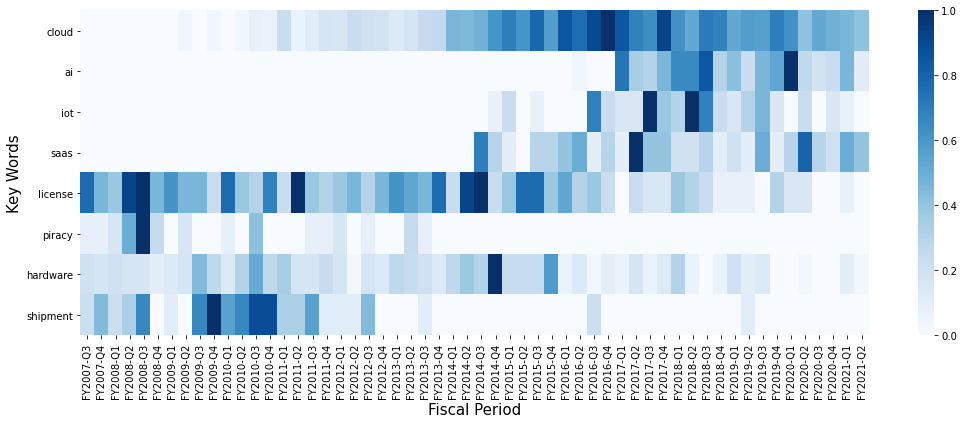

In [28]:
fig, ax = plt.subplots(1, 1, figsize = (15, 6))
sns.heatmap(df_msft_philstrat_1, cmap='Blues', annot=False)
ax.set_ylabel('Key Words', fontsize=15)    
ax.set_xlabel('Fiscal Period', fontsize=15)
plt.tight_layout()
plt.savefig('../Charts/keyword_frequency_heatmap1.png',dpi=600)

In [29]:
df_msft_philstrat_2 = df_msft.T.loc[['commercial','consumer','margin','cost','secular','differentiate','guidance','forecast']]

In [30]:
df_msft_philstrat_2.columns = pd.MultiIndex.from_tuples(fy_quarter_pair)

In [31]:
df_msft_philstrat_2 = df_msft_philstrat_2.div(df_msft_philstrat_2.max(axis=1), axis=0)

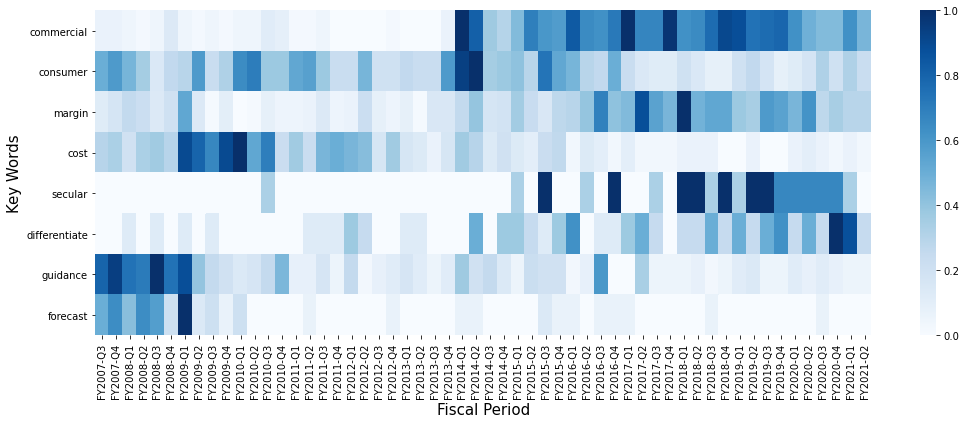

In [32]:
fig, ax = plt.subplots(1, 1, figsize = (15, 6))
sns.heatmap(df_msft_philstrat_2, cmap='Blues', annot=False)
ax.set_ylabel('Key Words', fontsize=15)    
ax.set_xlabel('Fiscal Period', fontsize=15)
plt.tight_layout()
plt.savefig('../Charts/keyword_frequency_heatmap2.png',dpi=600)

In [33]:
# Product history

In [34]:
df_msft.T.loc[['windows','office','nokia','bing','yahoo','xbox','linkedin','github']]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55
windows,1,3,2,1,1,0,0,1,0,1,3,1,1,1,3,1,0,2,2,2,2,1,3,1,1,3,1,2,2,1,0,1,2,2,1,1,3,0,1,0,1,3,1,2,1,2,1,0,1,0,0,0,0,0,0,0
office,14,8,13,26,3,11,5,6,7,8,3,7,15,13,26,24,24,16,21,13,9,21,19,11,24,19,41,33,32,36,32,47,62,44,35,36,30,37,25,30,31,19,25,33,19,18,18,17,16,21,14,12,21,18,23,19
nokia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,2,1,6,2,2,1,1,0,1,5,6,10,7,3,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
bing,0,0,0,0,0,0,0,0,0,4,5,3,3,2,4,5,5,3,4,2,1,4,4,1,1,0,2,1,3,7,6,3,8,4,4,2,0,4,2,2,2,1,2,0,1,1,1,1,1,0,1,1,0,0,0,0
yahoo,0,0,0,0,24,20,1,1,0,0,7,4,4,2,3,4,6,6,10,1,0,3,0,1,0,0,0,0,0,0,0,0,2,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
xbox,9,15,9,14,9,8,8,9,8,5,7,7,4,5,9,7,13,14,15,11,5,10,9,12,9,7,27,18,7,9,10,18,10,13,9,10,11,13,8,6,8,5,14,15,9,3,7,6,4,8,2,6,4,8,7,9
linkedin,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,1,46,25,26,28,28,24,12,11,14,14,13,10,14,17,9,10,7
github,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,17,12,4,7,6,9,11,9,4,1


## Sentiment Analysis (Loughran and McDonald Financial Sentiment Dictionaries)

In [35]:
master = pd.read_csv('../Data/LoughranMcDonald_MasterDictionary_2018.csv')

In [36]:
master

,Word,Sequence Number,Word Count,Word Proportion,Average Proportion,Std Dev,Doc Count,Negative,Positive,Uncertainty,Litigious,Constraining,Superfluous,Interesting,Modal,Irr_Verb,Harvard_IV,Syllables,Source
0,AARDVARK,1,277,1.480000e-08,1.240000e-08,3.560000e-06,84,0,0,0,0,0,0,0,0,0,0,2,12of12inf
1,AARDVARKS,2,3,1.600000e-10,9.730000e-12,9.860000e-09,1,0,0,0,0,0,0,0,0,0,0,2,12of12inf
2,ABACI,3,8,4.280000e-10,1.390000e-10,6.230000e-08,7,0,0,0,0,0,0,0,0,0,0,3,12of12inf
3,ABACK,4,12,6.410000e-10,3.160000e-10,9.380000e-08,12,0,0,0,0,0,0,0,0,0,0,2,12of12inf
4,ABACUS,5,7250,3.870000e-07,3.680000e-07,3.370000e-05,914,0,0,0,0,0,0,0,0,0,0,3,12of12inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86481,ZYGOTE,86482,46,2.460000e-09,9.690000e-10,2.060000e-07,31,0,0,0,0,0,0,0,0,0,0,2,12of12inf
86482,ZYGOTES,86483,1,5.340000e-11,2.040000e-11,2.070000e-08,1,0,0,0,0,0,0,0,0,0,0,2,12of12inf
86483,ZYGOTIC,86484,0,0.000000e+00,0.000000e+00,0.000000e+00,0,0,0,0,0,0,0,0,0,0,0,3,12of12inf
86484,ZYMURGIES,86485,0,0.000000e+00,0.000000e+00,0.000000e+00,0,0,0,0,0,0,0,0,0,0,0,3,12of12inf


In [37]:
positive = master[master["Positive"]>0]
negative = master[master["Negative"]>0]
uncertainty = master[master["Uncertainty"]>0]
litigious = master[master["Litigious"]>0]
constraining = master[master["Constraining"]>0]
superfluous = master[master["Superfluous"]>0]


pos_words = [word.lower() for word in positive["Word"].tolist()]
neg_words = [word.lower() for word in negative["Word"].tolist()]
uncert_words = [word.lower() for word in uncertainty["Word"].tolist()]
litigi_words = [word.lower() for word in litigious["Word"].tolist()]
constr_words = [word.lower() for word in constraining["Word"].tolist()]
superf_words = [word.lower() for word in superfluous["Word"].tolist()]

### Sentiment analysis on each transcript in the entire corpus 

In [38]:
msft_earnings_dict_cleaned = pickle.load(open('cleaned_corpus.pickle', 'rb'))

msft_earnings_dict_ordered = {}

for tscript in sorted(msft_earnings_dict_cleaned):
    msft_earnings_dict_ordered[tscript] = msft_earnings_dict_cleaned[tscript]

In [39]:
msft_earnings_dict_ordered = {}

for tscript in sorted(msft_earnings_dict_cleaned):
    msft_earnings_dict_ordered[tscript] = msft_earnings_dict_cleaned[tscript]

In [40]:
msft_pos_words = {}
msft_neg_words = {}
msft_uncert_words = {}
# msft_litigi_words = {}
# msft_constr_words = {}
# msft_superf_words = {}

for tscript in msft_earnings_dict_ordered.keys():
    msft_pos_words[tscript] = [word for word in msft_earnings_dict_ordered[tscript] if word in pos_words]
    msft_neg_words[tscript] = [word for word in msft_earnings_dict_ordered[tscript] if word in neg_words]
    msft_uncert_words[tscript] = [word for word in msft_earnings_dict_ordered[tscript] if word in uncert_words]
#     msft_litigi_words[tscript] = [word for word in msft_earnings_dict_ordered[tscript] if word in litigi_words]
#     msft_constr_words[tscript] = [word for word in msft_earnings_dict_ordered[tscript] if word in constr_words]
#     msft_superf_words[tscript] = [word for word in msft_earnings_dict_ordered[tscript] if word in superf_words]
    

In [41]:
msft_pos_words_unique = {x for l in list(msft_pos_words.values()) for x in l}
msft_neg_words_unique = {x for l in list(msft_neg_words.values()) for x in l}
msft_uncert_words_unique = {x for l in list(msft_uncert_words.values()) for x in l}
# msft_litigi_words_unique = {x for l in list(msft_litigi_words.values()) for x in l}
# msft_constr_words_unique = {x for l in list(msft_constr_words.values()) for x in l}
# msft_superf_words_unique = {x for l in list(msft_superf_words.values()) for x in l}

In [42]:
msft_pos_count = [len(doc) for doc in list(msft_pos_words.values())]
msft_neg_count = [len(doc) for doc in list(msft_neg_words.values())]
msft_uncert_count = [len(doc) for doc in list(msft_uncert_words.values())]
# msft_litigi_count = [len(doc) for doc in list(msft_litigi_words.values())]
# msft_constr_count = [len(doc) for doc in list(msft_constr_words.values())]
# msft_superf_count = [len(doc) for doc in list(msft_superf_words.values())]

In [43]:
df_sentiment_count = pd.DataFrame({'Positive': msft_pos_count, 
                                   'Negative': msft_neg_count, 
                                   'Uncertainty': msft_uncert_count, 
#                                    'Litigious': msft_litigi_count,
#                                    'Constraining': msft_constr_count,
#                                    'Superfluous': msft_superf_count
                                  }, index=msft_earnings_dict_ordered.keys())

In [44]:
df_sentiment_count = df_sentiment_count.T

In [45]:
df_sentiment_count.columns = pd.MultiIndex.from_tuples(fy_quarter_pair)

In [46]:
df_sentiment_count

FY2007     FY2008             FY2009              FY2010          \
                Q3  Q4     Q1  Q2  Q3  Q4     Q1   Q2  Q3  Q4     Q1  Q2  Q3   
Positive        88  82     98  78  67  63     58   72  68  90    108  66  54   
Negative        26  31     38  30  56  56     72  113  96  97     55  29  23   
Uncertainty     65  48     57  50  58  56     88   74  61  50     60  45  40   

                FY2011               FY2012             FY2013              \
             Q4     Q1   Q2   Q3  Q4     Q1  Q2  Q3  Q4     Q1  Q2  Q3  Q4   
Positive     75     64  105  105  76     81  91  68  99     70  69  85  58   
Negative     22     16   20   16  21     35  33  16  26     46  19  23  32   
Uncertainty  27     37   34   24  39     33  35  37  31     32  27  27  35   

            FY2014               FY2015                FY2016                \
                Q1  Q2   Q3   Q4     Q1   Q2   Q3   Q4     Q1   Q2  Q3   Q4   
Positive       132  93  123  100    128  129  115  137    107  129  88  122   
Negative        36  32   18   27     38   53   36   59     51   48  58   48   
Uncertainty     62  32   35   21     34   37   41   45     34   41  40   57   

            FY2017                FY2018                FY2019                 \
                Q1   Q2   Q3   Q4     Q1   Q2   Q3   Q4     Q1   Q2   Q3   Q4   
Positive       106  120  107  114    128  111  136  112    140  116  138  119   
Negative        44   43   43   35     22   28   26   25     32   38   28   23   
Uncertainty     38   42   50   48     50   38   47   48     54   47   49   41   

            FY2020                FY2021      
                Q1   Q2   Q3   Q4     Q1  Q2  
Positive       120  120  101  102    118  97  
Negative        26   19   56   47     44  20  
Uncertainty     39   36   52   47     61  55

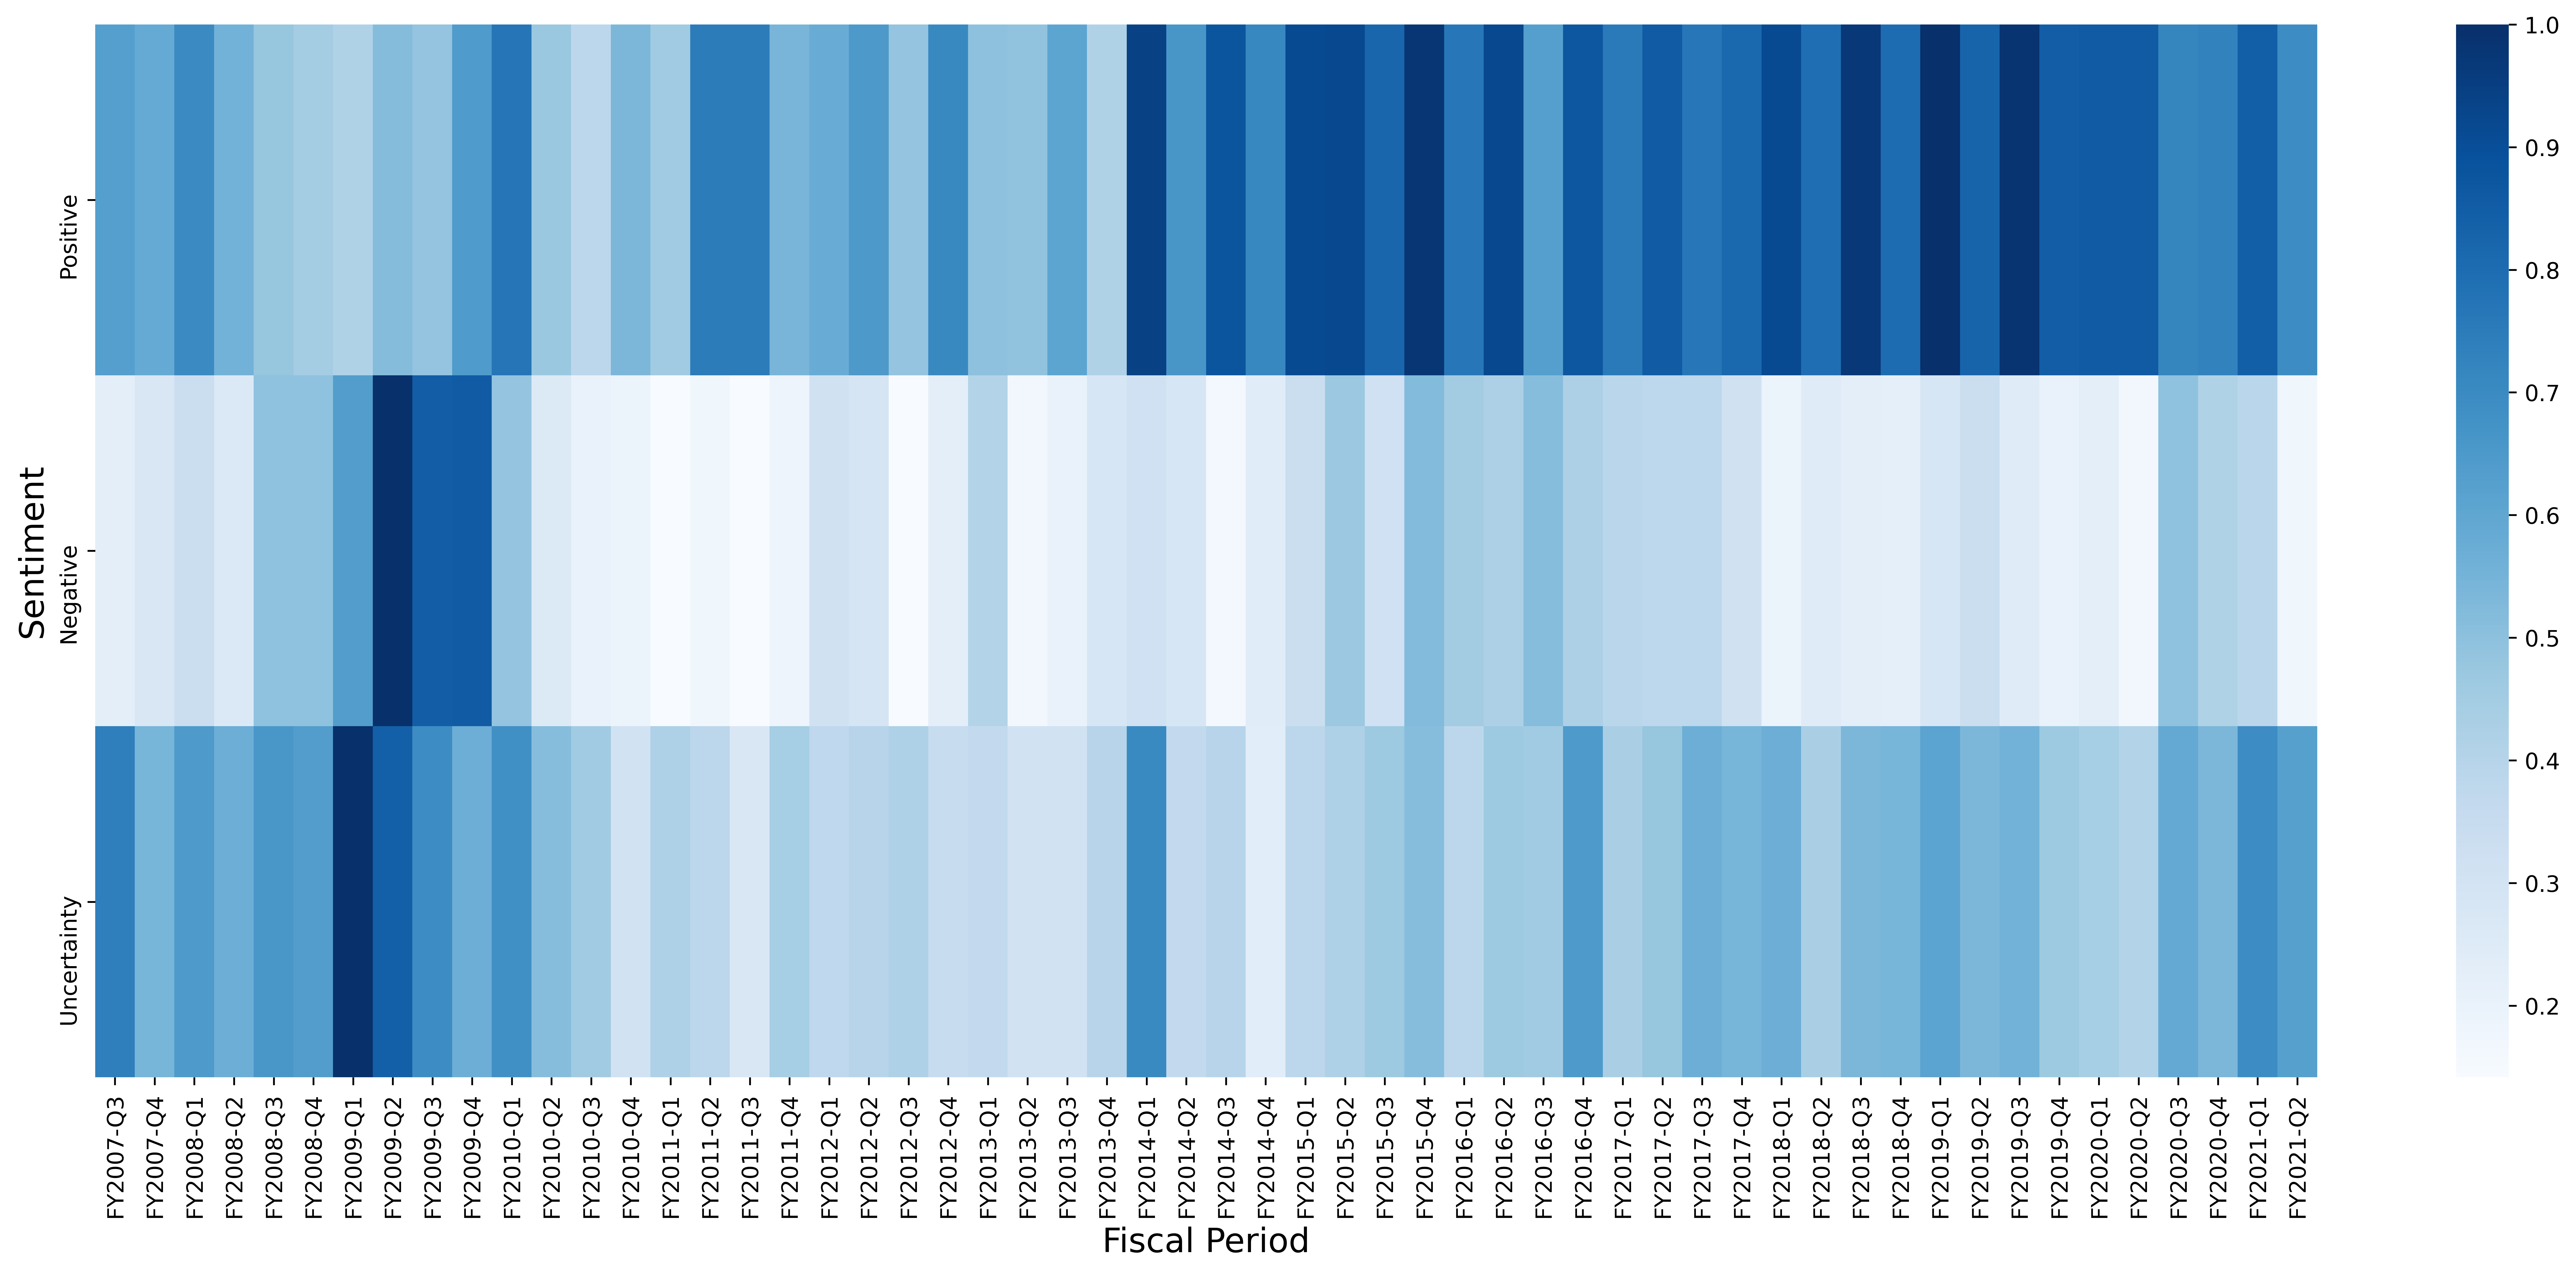

In [47]:
df_sentiment_count = df_sentiment_count.div(df_sentiment_count.max(axis=1), axis=0)

fig, ax = plt.subplots(1, 1, figsize = (18, 8), dpi=600)
sns.heatmap(df_sentiment_count, cmap='Blues', annot=False)
ax.set_ylabel('Sentiment', fontsize=15)    
ax.set_xlabel('Fiscal Period', fontsize=15)
plt.tight_layout()
plt.savefig('../Charts/sentiment_heatmap', dpi=600)

In [48]:
msft_pos_words

{'msft_07q3': ['strength',
  'strength',
  'benefit',
  'strength',
  'excellent',
  'strength',
  'benefit',
  'excellent',
  'strength',
  'strength',
  'delight',
  'benefit',
  'successful',
  'progress',
  'strength',
  'premier',
  'improvement',
  'benefit',
  'enhance',
  'favorable',
  'effective',
  'benefit',
  'benefit',
  'positive',
  'effective',
  'great',
  'benefit',
  'pleased',
  'opportunity',
  'opportunity',
  'stable',
  'innovation',
  'transparency',
  'positive',
  'opportunity',
  'successful',
  'great',
  'innovation',
  'best',
  'opportunity',
  'success',
  'benefit',
  'impressive',
  'benefit',
  'pleased',
  'benefit',
  'benefit',
  'optimistic',
  'favorite',
  'stabilized',
  'best',
  'great',
  'benefit',
  'happy',
  'great',
  'happy',
  'happy',
  'happy',
  'happy',
  'great',
  'strength',
  'great',
  'success',
  'happy',
  'happy',
  'strength',
  'great',
  'happy',
  'happy',
  'transparency',
  'easy',
  'profitability',
  'great',
  

In [49]:
corpus_msft_ordered = list(msft_earnings_dict_ordered.values())

In [50]:
lm = ps.LM()

In [51]:
sentiment_score_dict = {}
sentiment_score_dict['Positive'] = []
sentiment_score_dict['Negative'] = []
sentiment_score_dict['Polarity'] = []
sentiment_score_dict['Subjectivity'] = []

for doc in corpus_msft_ordered:
    score = lm.get_score(doc)
    sentiment_score_dict['Positive'].append(score['Positive'])
    sentiment_score_dict['Negative'].append(score['Negative'])
    sentiment_score_dict['Polarity'].append(score['Polarity'])
    sentiment_score_dict['Subjectivity'].append(score['Subjectivity'])

In [52]:
df_sentiment_score = pd.DataFrame(sentiment_score_dict, index=msft_earnings_dict_ordered.keys()).T

In [53]:
df_sentiment_score.columns = pd.MultiIndex.from_tuples(fy_quarter_pair)

In [54]:
df_sentiment_score

FY2007                FY2008                        \
                     Q3         Q4         Q1         Q2         Q3   
Positive      42.000000  24.000000  51.000000  36.000000  35.000000   
Negative      27.000000  27.000000  40.000000  24.000000  40.000000   
Polarity       0.217391  -0.058824   0.120879   0.200000  -0.066667   
Subjectivity   0.025018   0.017870   0.033382   0.022181   0.027342   

                            FY2009                                     FY2010  \
                     Q4         Q1         Q2        Q3         Q4         Q1   
Positive      22.000000  26.000000  32.000000  29.00000  37.000000  43.000000   
Negative      41.000000  45.000000  60.000000  51.00000  51.000000  32.000000   
Polarity      -0.301587  -0.267606  -0.304348  -0.27500  -0.159091   0.146667   
Subjectivity   0.022364   0.025026   0.032636   0.02984   0.030376   0.029821   

                                                  FY2011             \
                     Q2         Q3         Q4         Q1         Q2   
Positive      31.000000  25.000000  33.000000  31.000000  35.000000   
Negative      20.000000  13.000000  16.000000  11.000000  19.000000   
Polarity       0.215686   0.315789   0.346939   0.476190   0.296296   
Subjectivity   0.025615   0.019270   0.028373   0.022678   0.026137   

                                       FY2012                        \
                     Q3         Q4         Q1         Q2         Q3   
Positive      46.000000  27.000000  27.000000  35.000000  31.000000   
Negative      12.000000  18.000000  29.000000  19.000000  20.000000   
Polarity       0.586207   0.200000  -0.035714   0.296296   0.215686   
Subjectivity   0.029851   0.023256   0.026718   0.025081   0.026466   

                            FY2013                                   \
                     Q4         Q1         Q2         Q3         Q4   
Positive      41.000000  26.000000  33.000000  31.000000  20.000000   
Negative      25.000000  29.000000  14.000000  16.000000  12.000000   
Polarity       0.242424  -0.054545   0.404255   0.319149   0.250000   
Subjectivity   0.030899   0.025218   0.021550   0.022254   0.015238   

                 FY2014                                      FY2015  \
                     Q1         Q2         Q3         Q4         Q1   
Positive      54.000000  33.000000  40.000000  40.000000  44.000000   
Negative      19.000000  33.000000   8.000000  18.000000  14.000000   
Polarity       0.479452   0.000000   0.666667   0.379310   0.517241   
Subjectivity   0.024957   0.025492   0.017304   0.018448   0.020908   

                                                 FY2016                        \
                     Q2        Q3         Q4         Q1         Q2         Q3   
Positive      56.000000  42.00000  49.000000  45.000000  47.000000  32.000000   
Negative      27.000000  18.00000  19.000000  23.000000  12.000000  21.000000   
Polarity       0.349398   0.40000   0.441176   0.323529   0.593220   0.207547   
Subjectivity   0.024390   0.01827   0.019976   0.021066   0.017819   0.016439   

                            FY2017                                   \
                     Q4         Q1         Q2         Q3         Q4   
Positive      48.000000  31.000000  39.000000  26.000000  46.000000   
Negative      18.000000  24.000000  15.000000  18.000000  16.000000   
Polarity       0.454545   0.127273   0.444444   0.181818   0.483871   
Subjectivity   0.020079   0.017367   0.015896   0.012651   0.018920   

                 FY2018                                      FY2019  \
                     Q1         Q2         Q3         Q4         Q1   
Positive      28.000000  32.000000  48.000000  50.000000  61.000000   
Negative      16.000000  23.000000  22.000000  20.000000  27.000000   
Polarity       0.272727   0.163636   0.371429   0.428571   0.386364   
Subjectivity   0.012600   0.016215   0.019960   0.025099   0.028909   

                                                  FY20

### Comparing sentiment between Ballmer and Nadella corpus

In [55]:
# Flatten word list of lists and count the words
## Ballmer

ballmer_pos_words = [[word for word in doc if word in pos_words] for doc in corpus_ballmer]
ballmer_pos_count = len(list(itertools.chain(*ballmer_pos_words)))

ballmer_neg_words = [[word for word in doc if word in neg_words] for doc in corpus_ballmer]
ballmer_neg_count = len(list(itertools.chain(*ballmer_neg_words)))

ballmer_uncert_words = [[word for word in doc if word in uncert_words] for doc in corpus_ballmer]
ballmer_uncert_count = len(list(itertools.chain(*ballmer_uncert_words)))

ballmer_litigi_words = [[word for word in doc if word in litigi_words] for doc in corpus_ballmer]
ballmer_litigi_count = len(list(itertools.chain(*ballmer_litigi_words)))

ballmer_constr_words = [[word for word in doc if word in constr_words] for doc in corpus_ballmer]
ballmer_constr_count = len(list(itertools.chain(*ballmer_constr_words)))

# ballmer_superf_words = [[word for word in doc if word in superf_words] for doc in corpus_ballmer]
# ballmer_superf_count = len(list(itertools.chain(*ballmer_superf_words)))

## Nadella

nadella_pos_words = [[word for word in doc if word in pos_words] for doc in corpus_nadella]
nadella_pos_count = len(list(itertools.chain(*nadella_pos_words)))

nadella_neg_words = [[word for word in doc if word in neg_words] for doc in corpus_nadella]
nadella_neg_count = len(list(itertools.chain(*nadella_neg_words)))

nadella_uncert_words = [[word for word in doc if word in uncert_words] for doc in corpus_nadella]
nadella_uncert_count = len(list(itertools.chain(*nadella_uncert_words)))

nadella_litigi_words = [[word for word in doc if word in litigi_words] for doc in corpus_nadella]
nadella_litigi_count = len(list(itertools.chain(*nadella_litigi_words)))

nadella_constr_words = [[word for word in doc if word in constr_words] for doc in corpus_nadella]
nadella_constr_count = len(list(itertools.chain(*nadella_constr_words)))

# nadella_superf_words = [[word for word in doc if word in superf_words] for doc in corpus_nadella]
# nadella_superf_count = len(list(itertools.chain(*nadella_superf_words)))

In [56]:
df_sentiment_count_ballnad = pd.DataFrame({'Positive': [ballmer_pos_count,nadella_pos_count], 
                                   'Negative': [ballmer_neg_count,nadella_neg_count], 
                                   'Uncertainty': [ballmer_uncert_count,nadella_uncert_count],
                                   'Litigious': [ballmer_litigi_count,nadella_litigi_count],
                                   'Constraining': [ballmer_constr_count,nadella_constr_count], 
#                                    'Superfluous': [ballmer_superf_count,nadella_superf_count]
                                  }, index=['Ballmer Era','Nadella Era'])

In [57]:
df_sentiment_count_ballnad = df_sentiment_count_ballnad.T

In [58]:
df_sentiment_count_ballnad

,Ballmer Era,Nadella Era
Positive,2263,3283
Negative,1115,1035
Uncertainty,1264,1227
Litigious,239,181
Constraining,229,225


## Sentiment Analysis (using TextBlob)

In [59]:
corpus_msft_ordered_untokenized = []

for doc in corpus_msft_ordered:
    corpus_msft_ordered_untokenized.append(' '.join(doc))

In [60]:
for text in corpus_msft_ordered_untokenized:
    print(TextBlob(text).sentiment)
#     print(TextBlob(text, analyzer=NaiveBayesAnalyzer()).sentiment)

Sentiment(polarity=0.13453818836797551, subjectivity=0.43968611307263805)
Sentiment(polarity=0.13460040143410182, subjectivity=0.49005283324115917)
Sentiment(polarity=0.16435868115113395, subjectivity=0.48762829610117336)
Sentiment(polarity=0.10901175393093511, subjectivity=0.4383256518385825)
Sentiment(polarity=0.07729192265764322, subjectivity=0.4468952863003086)
Sentiment(polarity=0.09376035457521056, subjectivity=0.427400013758107)
Sentiment(polarity=0.07356401559145462, subjectivity=0.44197823912763)
Sentiment(polarity=0.031279485027240865, subjectivity=0.4374184911438052)
Sentiment(polarity=0.07059967929838347, subjectivity=0.4662052724093766)
Sentiment(polarity=0.06284923071508455, subjectivity=0.439776118190752)
Sentiment(polarity=0.07954086471692111, subjectivity=0.43113031725707773)
Sentiment(polarity=0.09697858282068803, subjectivity=0.428983734588998)
Sentiment(polarity=0.07647866419294987, subjectivity=0.3930046897546896)
Sentiment(polarity=0.13948780721966206, subjectivit

## Wordcloud

In [61]:
cv_ballmer = CountVectorizer(tokenizer=lambda doc: doc, lowercase=False, min_df=2)
X_ballmer = cv_ballmer.fit_transform(corpus_ballmer).toarray()

cv_nadella = CountVectorizer(tokenizer=lambda doc: doc, lowercase=False, min_df=2)
X_nadella = cv_nadella.fit_transform(corpus_nadella).toarray()

In [62]:
sum_words_ballmer = X_ballmer.sum(axis=0)
words_freq_ballmer = [(word, sum_words_ballmer[idx]) for word, idx in cv_ballmer.vocabulary_.items()]
words_freq_ballmer = sorted(words_freq_ballmer, key = lambda x:x[1], reverse=True)

sum_words_nadella = X_nadella.sum(axis=0)
words_freq_nadella = [(word, sum_words_nadella[idx]) for word, idx in cv_nadella.vocabulary_.items()]
words_freq_nadella = sorted(words_freq_nadella, key = lambda x:x[1], reverse=True)

In [63]:
ballmer_wordcloud = WordCloud(width=400, height=330, max_words=150,colormap="Dark2")

(-0.5, 399.5, 329.5, -0.5)

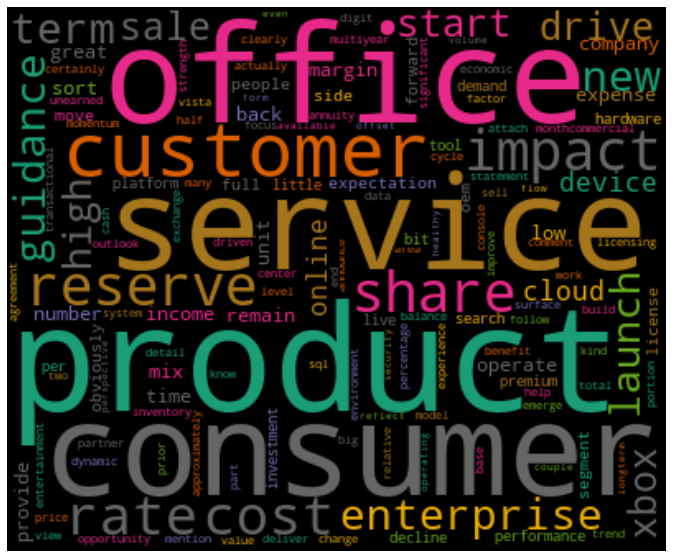

In [64]:
ballmer_wordcloud.generate_from_frequencies(dict(words_freq_ballmer))

plt.figure(figsize=(12,10))
plt.imshow(ballmer_wordcloud, interpolation="bilinear")
plt.axis("off")

In [65]:
nadella_wordcloud = WordCloud(width=400, height=330, max_words=150,colormap="Dark2")

(-0.5, 399.5, 329.5, -0.5)

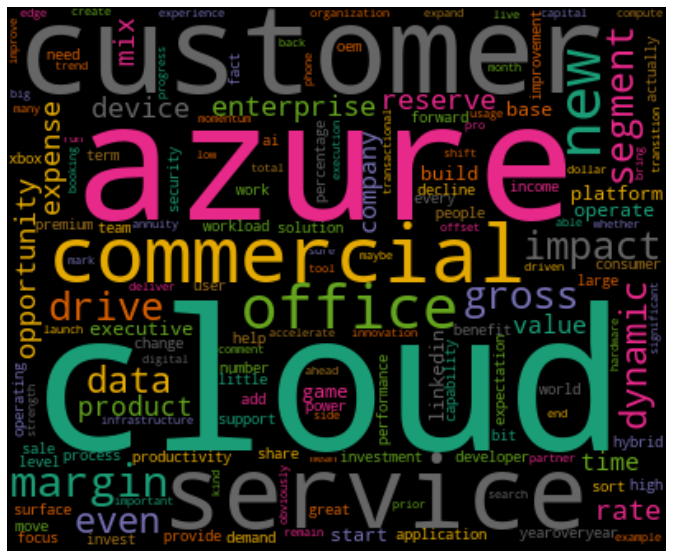

In [66]:
nadella_wordcloud.generate_from_frequencies(dict(words_freq_nadella))

plt.figure(figsize=(12,10))
plt.imshow(nadella_wordcloud, interpolation="bilinear")
plt.axis("off")

## Visualizing Word2Vec Word Embeddings using t-SNE

### Unigrams

In [67]:
model = word2vec.Word2Vec(corpus_msft)

In [112]:
model_selective = word2vec.Word2Vec(corpus_msft, min_count=100, window=20, ns_exponent = -10)

In [113]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 8)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
        
    plt.tight_layout()
    plt.savefig('../Charts/word2vec_tsne_plot', dpi=600)

<ipython-input-113-a3421f2b9004>:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  tokens.append(model[word])


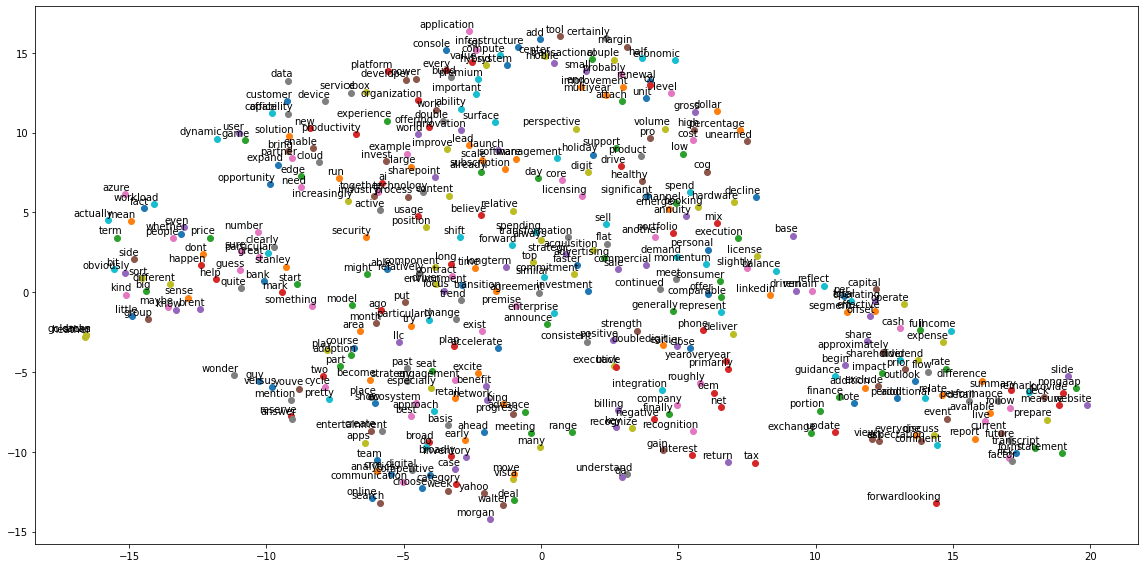

In [114]:
tsne_plot(model_selective)

In [71]:
model_selective.most_similar('licensing')

<ipython-input-71-0236558cda24>:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  model_selective.most_similar('licensing')


[('strength', 0.9878001809120178),
 ('multiyear', 0.9834405183792114),
 ('agreement', 0.9805174469947815),
 ('transactional', 0.9756395816802979),
 ('annuity', 0.9667711853981018),
 ('commercial', 0.9591875076293945),
 ('license', 0.9433932900428772),
 ('renewal', 0.9409666657447815),
 ('nonannuity', 0.919654130935669),
 ('weakness', 0.9186343550682068)]

### Bigrams

In [72]:
corpus_msft_bi = pickle.load(open('cleaned_corpus_bi_msft.pickle', 'rb'))

In [73]:
model_bi = word2vec.Word2Vec(corpus_msft_bi)

In [74]:
model_selective_bi = word2vec.Word2Vec(corpus_msft_bi, min_count=60, window=10, negative=100)

<ipython-input-69-2e8c1c1d4627>:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  tokens.append(model[word])


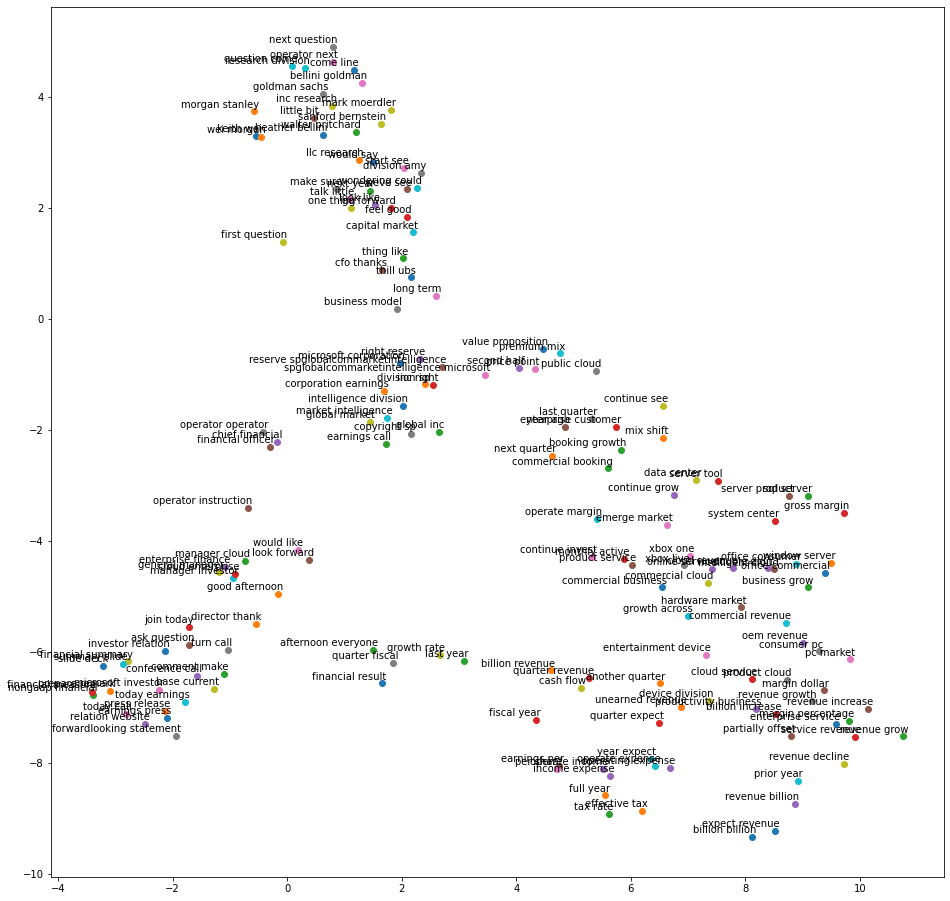

In [75]:
tsne_plot(model_selective_bi)